# Fraud Detection

Credit card fraud is a wide-ranging term for theft and fraud commited using or involving a payment card, such a credit card or debit card, as fraudulent source of funds in a transaction. The purpose may be to obtain goods without paying, or to obtain unautorized funds from an account. Credit card fraud is also adjunt to identity theft.

## Load Data

Dataset: https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.758743e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.252298e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.636929e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.316157e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.591952e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.247354e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.050180e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.693344e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179712e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## EDA

### Fraud vs Time

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Amount')

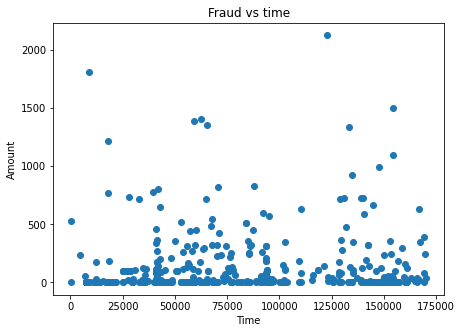

In [9]:
df1 = df[df.Class == 1]

plt.figure(figsize=(7,5))
plt.scatter(df1['Time'], df1['Amount'])
plt.title('Fraud vs time')
plt.xlabel('Time')
plt.ylabel('Amount')

Time doesn't seem to impact the frequency or amount of frauds.  
Plus, the majority of frauds are small amounts.

In [10]:
print('There are {:d} frauds with an amount >1000'.format(
    len(df1[df1['Amount'] > 1000])
))

There are 9 frauds with an amount >1000


### Correlation between Class & other attributes

In [12]:
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'Correlation')

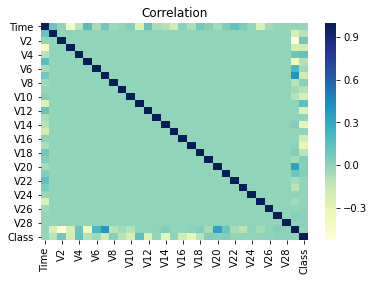

In [13]:
df_corr = df.corr()
sns.heatmap(df_corr, cmap='YlGnBu')
plt.title('Correlation')

In [14]:
np.abs(df_corr['Class']).sort_values(ascending=False)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

### Dealing with Unbalanced data

In [15]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset is unbalanced, a model probably won't learn to predict fraud as-is. We will undersample the non-fraudulent transactions.

In [16]:
df_train = df[0:150000]

df1 = df_train[df_train['Class'] == 1]
df0 = df_train[df_train['Class'] == 0]
print('{:d} frauds / {:d} non-frauds'.format(len(df1), len(df0)))

293 frauds / 149707 non-frauds


In [17]:
# Take 293 fraudulent + 300 non-fraudulent as training data
# Then shuffle the dataset
df_train = df1.append(df0.sample(300)) \
              .sample(frac=1)

df_train['Class'].value_counts()

0    300
1    293
Name: Class, dtype: int64

### Split dataset

In [18]:
X_train = df_train.drop(['Time', 'Class'], axis=1).values
y_train = df_train['Class'].values

In [19]:
df_test = df[150000:]

X_test  = df_test.drop(['Time', 'Class'], axis=1).values
y_test  = df_test['Class'].values

In [20]:
df_train, df_test, df1, df0 = None, None, None, None

## Train Model

In [21]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [22]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Evaluate

In [23]:
y_predict = classifier.predict(X_test)

In [24]:
import itertools

def plot_confusion_matrix(cm, classes=['0', '1'],
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

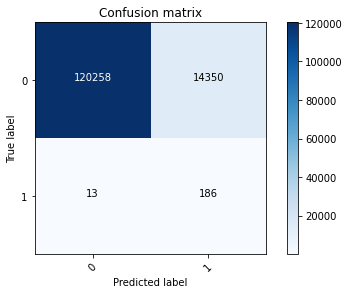

In [25]:
cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm)

In [26]:
cm

array([[120258,  14350],
       [    13,    186]])

In [27]:
TP, FP = cm[0]
FN, TN = cm[1]

print('We have detected {:d} frauds / {:d} total frauds.\n'.format( TN, TN+FN ))

print('• probability to detect a fraud: {:.3f}'.format( TN/(TN+FN) ))
print('• accuracy : {:.3f}'.format( (TP+TN) / (TP+FP+FN+TN) ))

We have detected 186 frauds / 199 total frauds.

• probability to detect a fraud: 0.935
• accuracy : 0.893
